# Trabajo práctico integrador - Análisis de datos
## Carrera de Especialización En Inteligencia Artificial - Cohorte 17
### Autores:
* Horn, Martin
* Lloveras, Alejandro
* Méndez, Diego Martín
* Micozzi, María Luz

El dataset contiene más de 30000 registros de canciones de Spotify de 6 categorias (EDM, Latin, Pop, R&B, Rap y Rock) tomados por medio de la API de Spotify.
El dataset cuenta con información actualizada a fines del 2023.

Nos centraremos en el campo track_popularity y buscaremos su relación con otros campos que describen las características musicales como: key, tempo, danceability, energy, etc.; o el género/subgénero y año de lanzamiento.

### Campos:

| Variable                  | Descripción                                                                                                                                                                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track_id`                | ID único de la canción                                                                                                                                                                                                                          |
| `track_name`              | Nombre de la canción                                                                                                                                                                                                                             |
| `track_artist`            | Artista de la canción                                                                                                                                                                                                                            |
| `track_popularity`        | Popularidad de la canción (0-100), donde un valor más alto indica una mayor popularidad                                                                                                                                                         |
| `track_album_id`          | ID único del álbum                                                                                                                                                                                                                               |
| `track_album_name`        | Nombre del álbum de la canción                                                                                                                                                                                                                  |
| `track_album_release_date`| Fecha de lanzamiento del álbum                                                                                                                                                                                                                   |
| `playlist_name`           | Nombre de la lista de reproducción                                                                                                                                                                                                              |
| `playlist_id`             | ID de la lista de reproducción                                                                                                                                                                                                                   |
| `playlist_genre`          | Género de la lista de reproducción                                                                                                                                                                                                               |
| `playlist_subgenre`       | Subgénero de la lista de reproducción                                                                                                                                                                                                            |
| `danceability`            | La danceabilidad describe qué tan adecuada es una pista para bailar, basándose en una combinación de elementos musicales. Un valor de 0.0 es menos danceable y 1.0 es más danceable.                                                            |
| `energy`                  | La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Típicamente, las pistas energéticas se sienten rápidas y ruidosas.                                                                 |
| `key`                     | La tonalidad general estimada de la pista. Los enteros se asignan a notas utilizando la notación estándar de Clase de Tonos. Ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta tonalidad, el valor es -1.                          |
| `loudness`                | La sonoridad general de una pista en decibelios (dB). Los valores típicos oscilan entre -60 y 0 dB.                                                                                     |
| `mode`                    | El modo indica la modalidad (mayor o menor) de una pista. Mayor está representado por 1 y menor por 0.                                                                                  |
| `speechiness`             | La presencia de palabras habladas en una pista. Los valores por encima de 0.66 describen pistas que probablemente están hechas completamente de palabras habladas.                                                                           |
| `acousticness`            | Una medida de confianza de 0.0 a 1.0 sobre si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.                                                     |
| `instrumentalness`        | Predice si una pista no contiene voces. Valores por encima de 0.5 están destinados a representar pistas instrumentales.                                                                  |
| `liveness`                | Detecta la presencia de una audiencia en la grabación. Un valor superior a 0.8 proporciona una alta probabilidad de que la pista sea en vivo.                                          |
| `valence`                 | Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas). |
| `tempo`                   | El tempo estimado general de una pista en beats por minuto (BPM).                                                                                                                      |
| `duration_ms`             | Duración de la canción en milisegundos                                                                                                                                                                                                          |


In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# leer CSV
df = pd.read_csv('spotify_songs.csv')

## Exploración y Comprensión de los Datos

In [4]:
df.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
df.head(5)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [7]:
df.tail(5)

track_id                            track_name  \
32828  7bxnKAamR3snQ1VGLuVfC1  City Of Lights - Official Radio Edit   
32829  5Aevni09Em4575077nkWHz   Closer - Sultan & Ned Shepard Remix   
32830  7ImMqPP3Q1yfUHvsdn7wEo          Sweet Surrender - Radio Edit   
32831  2m69mhnfQ1Oq6lGtXuYhgX        Only For You - Maor Levi Remix   
32832  29zWqhca3zt5NsckZqDf6c                Typhoon - Original Mix   

         track_artist  track_popularity          track_album_id  \
32828    Lush & Simon                42  2azRoBBWEEEYhqV6sb7JrT   
32829  Tegan and Sara                20  6kD6KLxj7s8eCE3ABvAyf5   
32830     Starkillers                14  0ltWNSY9JgxoIZO4VzuCa6   
32831          Mat Zo                15  1fGrOkHnHJcStl14zNx8Jy   
32832    Julian Calor                27  0X3mUOm6MhxR7PzxG95rAo   

                   track_album_name track_album_release_date    playlist_name  \
32828    City Of Lights (Vocal Mix)               2014-04-28  ♥ EDM LOVE 2020   
32829                Closer Remixed               2013-03-08  ♥ EDM LOVE 2020   
32830  Sweet Surrender (Radio Edit)               2014-04-21  ♥ EDM LOVE 2020   
32831        Only For You (Remixes)               2014-01-01  ♥ EDM LOVE 2020   
32832                 Typhoon/Storm               2014-03-03  ♥ EDM LOVE 2020   

                  playlist_id playlist_genre  ... key  loudness  mode  \
32828  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   2    -1.814     1   
32829  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   0    -4.462     1   
32830  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   6    -4.899     0   
32831  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   2    -3.361     1   
32832  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   5    -4.571     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
32828       0.0936      0.076600          0.000000    0.0668   0.2100   
32829       0.0420      0.001710          0.004270    0.3750   0.4000   
32830       0.0481      0.108000          0.000001    0.1500   0.4360   
32831       0.1090      0.007920          0.127000    0.3430   0.3080   
32832       0.0385      0.000133          0.341000    0.7420   0.0894   

         tempo  duration_ms  
32828  128.170       204375  
32829  128.041       353120  
32830  127.989       210112  
32831  128.008       367432  
32832  127.984       337500  

[5 rows x 23 columns]

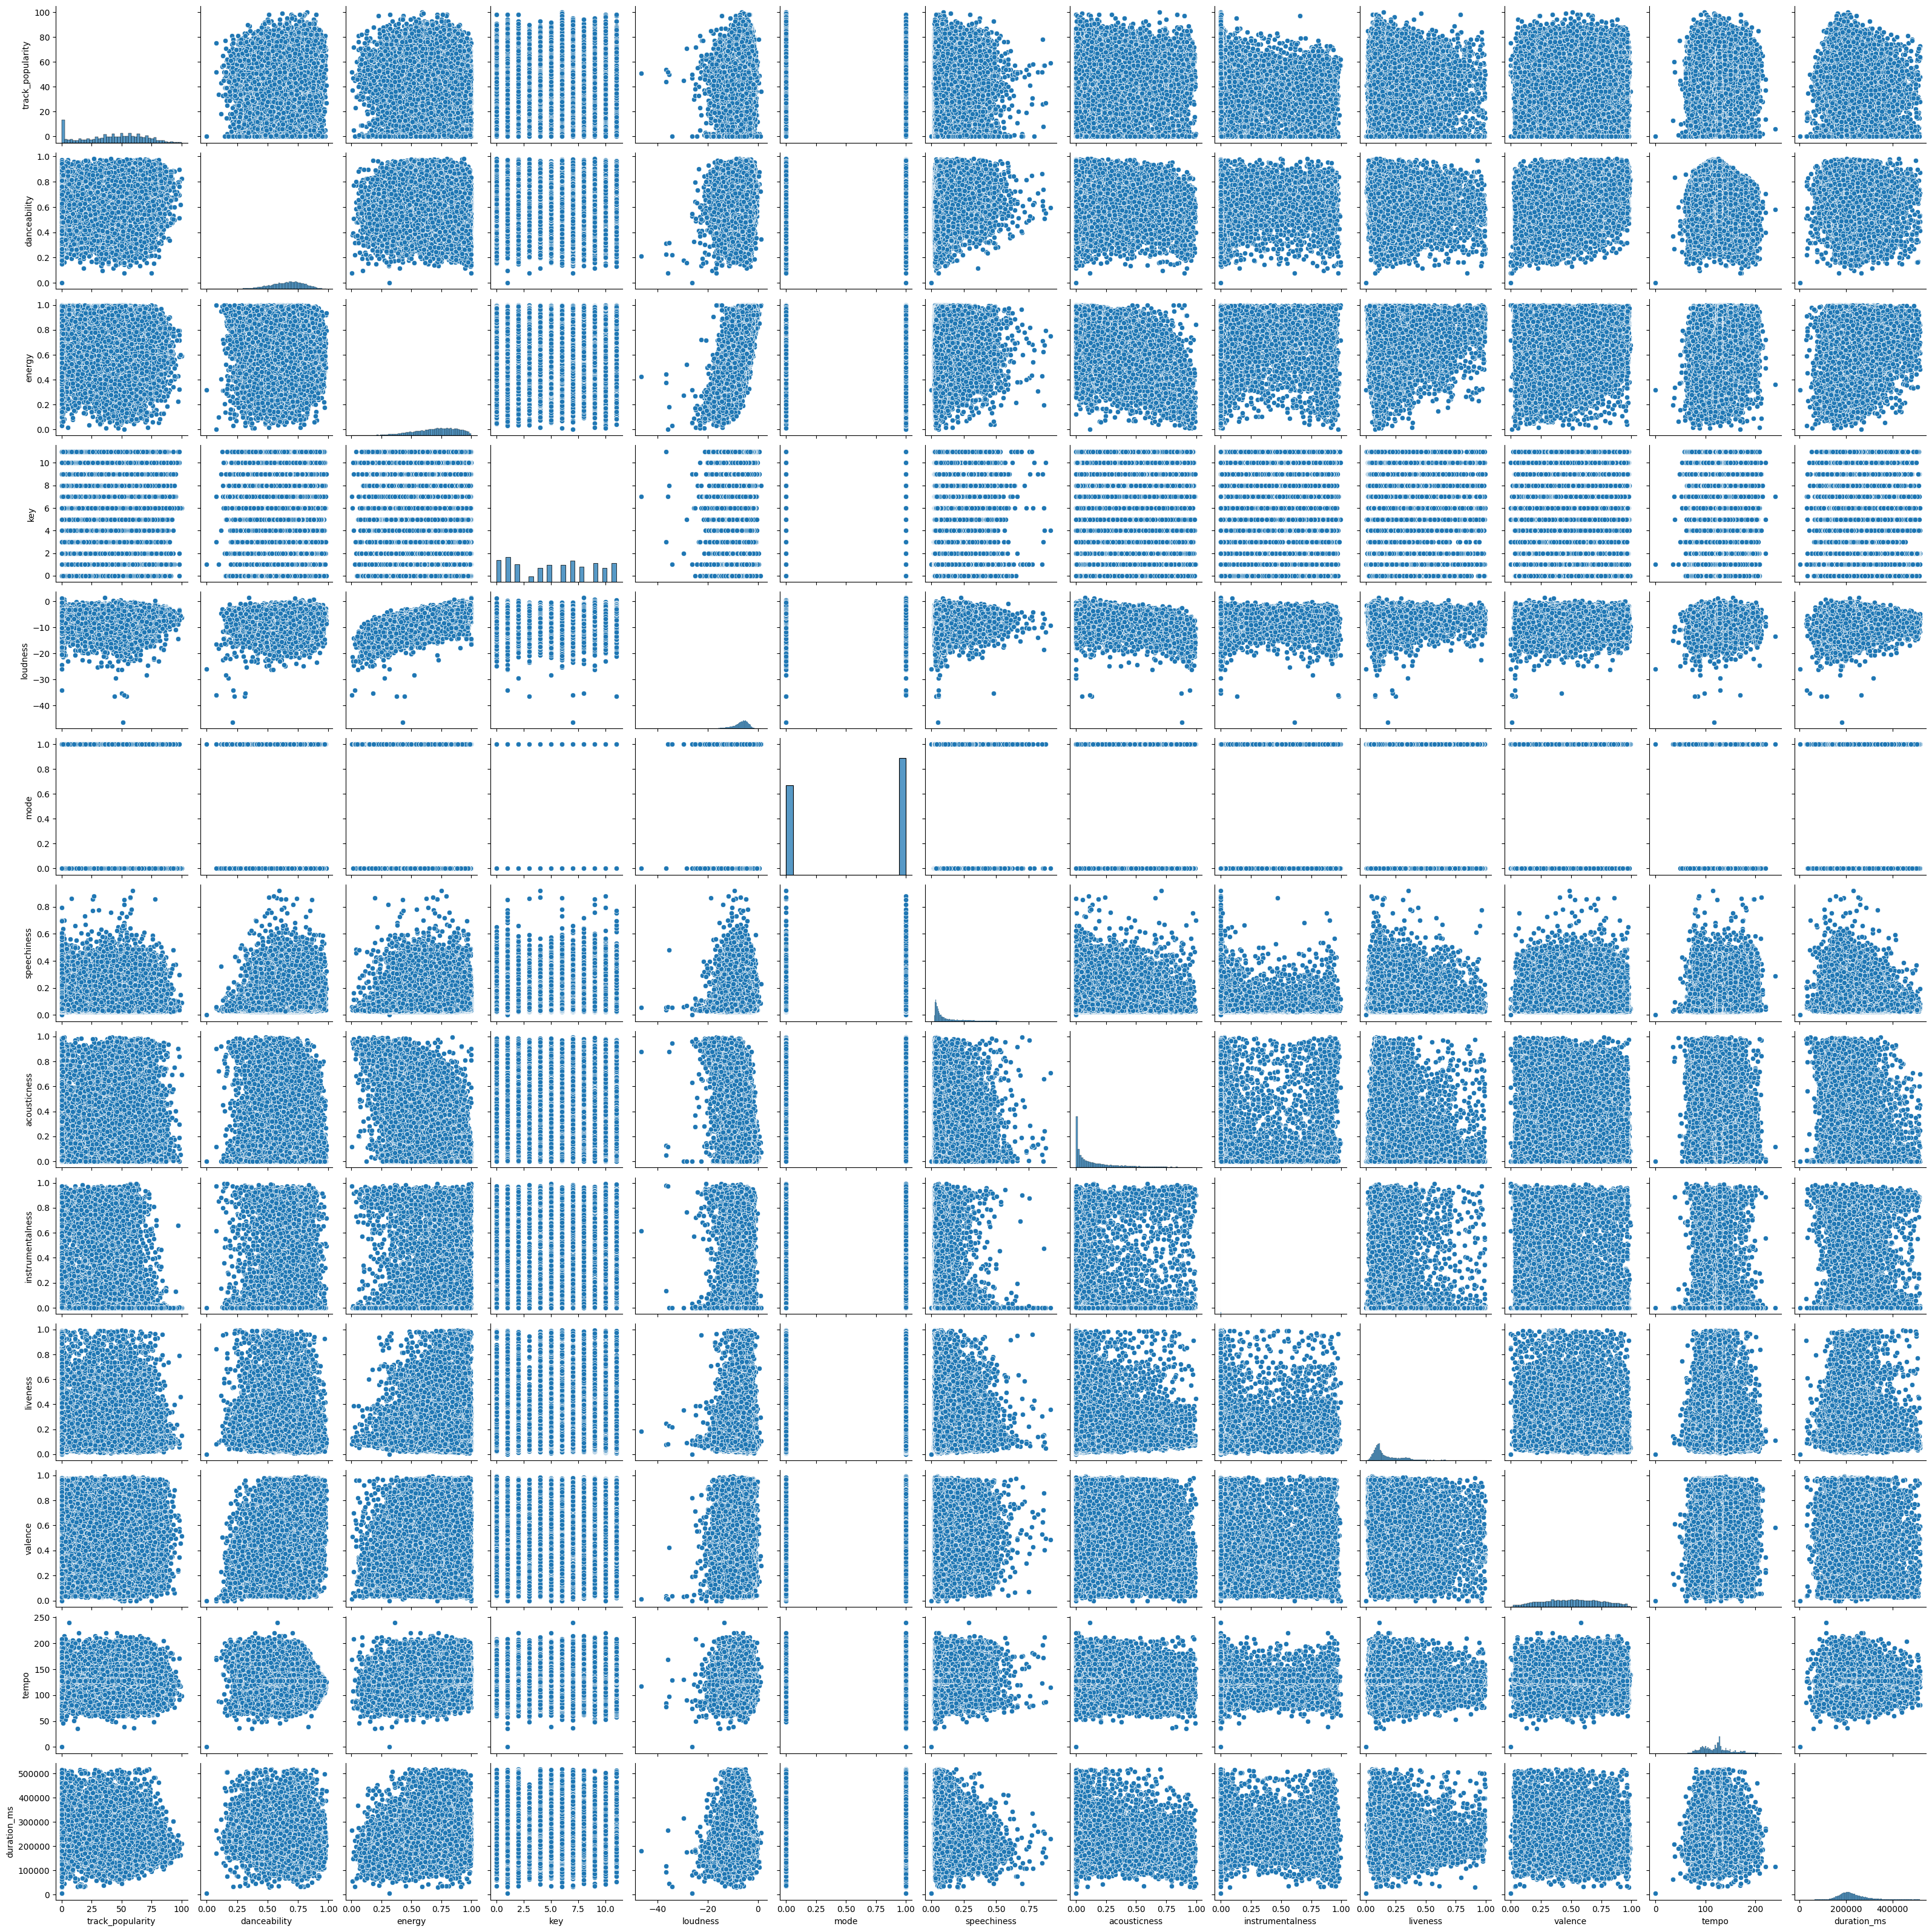

In [8]:
sns.pairplot(df)
plt.show()

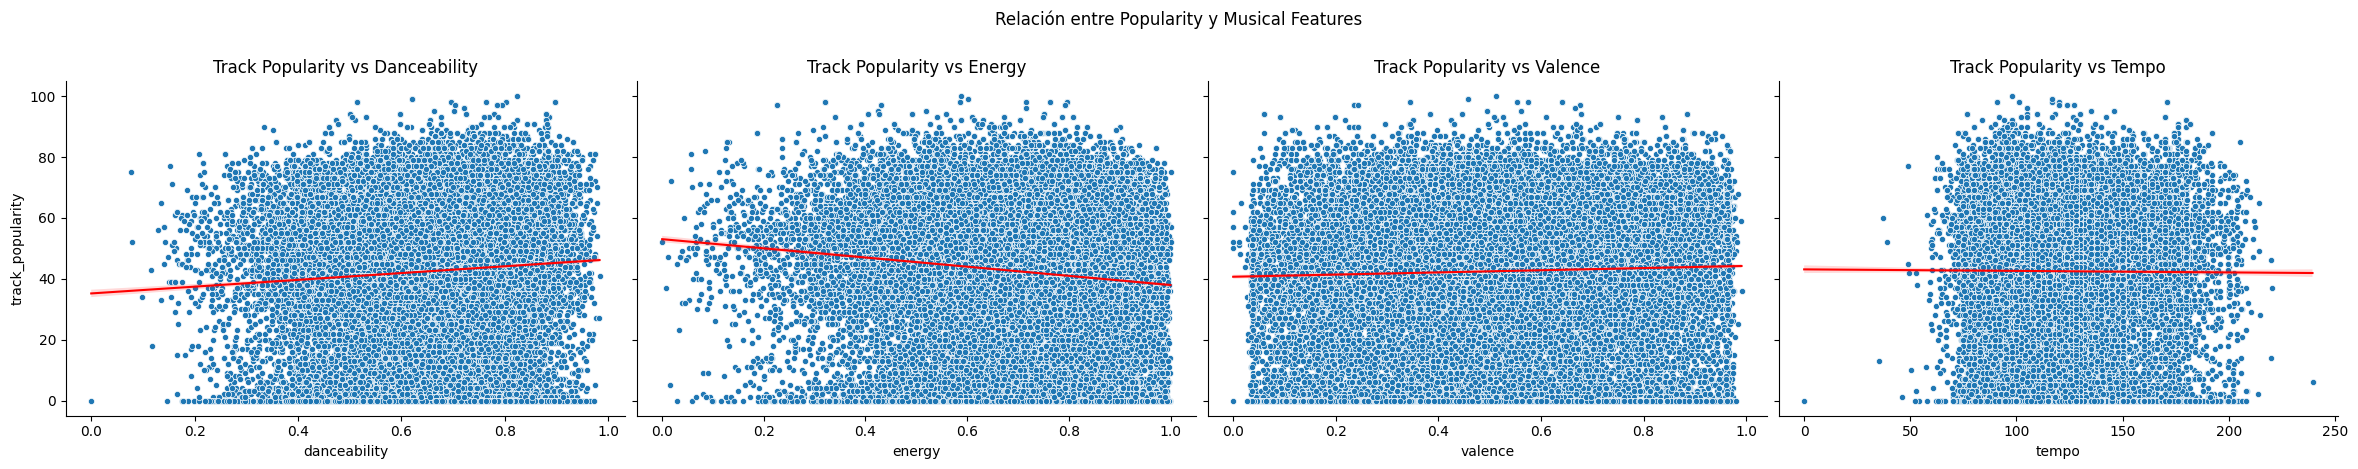

In [9]:
pp = sns.pairplot(df,
                 x_vars=['danceability', 'energy', 'valence', 'tempo'],
                 y_vars='track_popularity',
                 height=4,
                 aspect=1.5,  # Aspect ratio para agrandar los gráficos
                 kind='scatter',  # Scatter plot
                 plot_kws={'s': 20, 'edgecolor': 'w', 'linewidth': 0.5}
)

# Agregamos líneas de regresión
for ax in pp.axes.flat:
    sns.regplot(
        x=ax.collections[0].get_offsets()[:, 0],
        y=ax.collections[0].get_offsets()[:, 1],
        ax=ax,
        scatter=False,
        color='red',
        line_kws={'linewidth': 1.5}
    )

# Leyenda
for ax, feature in zip(pp.axes.flat, ['Danceability', 'Energy', 'Valence', 'Tempo']):
    ax.set_title(f'Track Popularity vs {feature}')
plt.suptitle('Relación entre Popularity y Musical Features', y=1.15)

plt.show()

## Gráficos

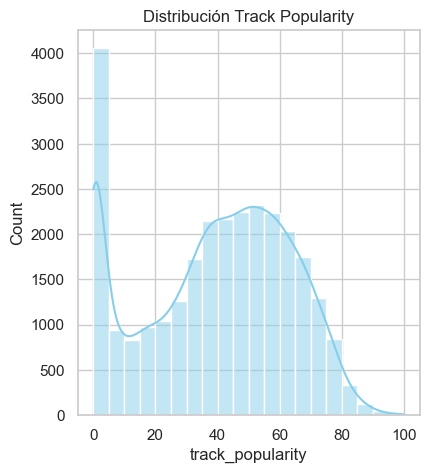

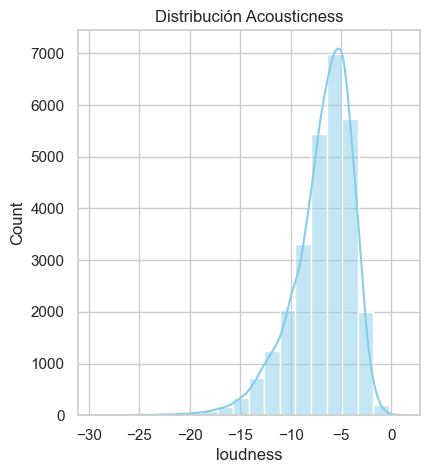

In [44]:
# Graficamos la distribución del campo track_popularity
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['track_popularity'], bins=20, kde=True, color="skyblue")
plt.title('Distribución Track Popularity')

# Graficamos la distribución del campo acousticness
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['loudness'], bins=20, kde=True, color="skyblue")
plt.title('Distribución Acousticness')

plt.show()

<Axes: >

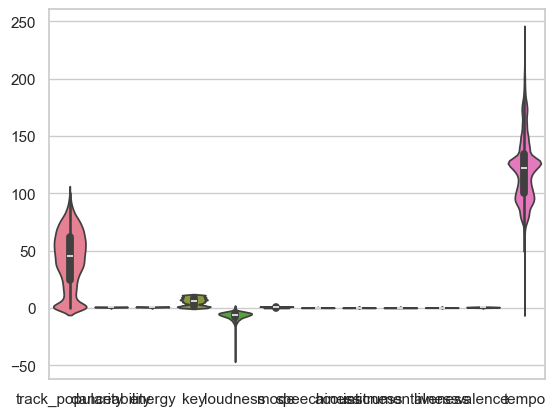

In [11]:
sns.violinplot( data=df.drop(['duration_ms'],axis=1))

<Axes: >

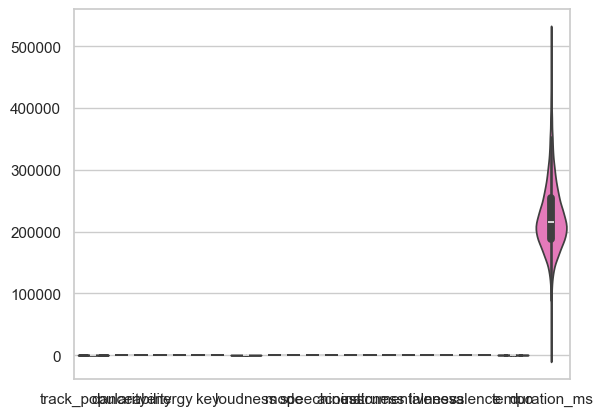

In [12]:
sns.violinplot(df)

## Tratamiento de valores nulos

In [13]:
df.sample(5)

track_id                                     track_name  \
1460   0QsKEPcviDIqoOdtZvbixA  It's Party Time (From "Hotel Transylvania 3")   
19364  5C9n2A1V6nNyZY9DhOZTue                                    No Es Justo   
2165   67lnQ6r4oWKZcM8VxSwHq2               Say Something - Zac Samuel Remix   
28140  7qzz3nKEBYarix1J5CdjZ0                                     Disruption   
15647  06YVA5Ajbk0Kv4ddFSEuBM              You Really Got Me - 2004 Remaster   

        track_artist  track_popularity          track_album_id  \
1460       Joe Jonas                44  7uS4VHNtrruzysflbjANoQ   
19364      Xcelencia                50  5V0uR0LIY0yEPRPMnEiyUX   
2165   Karen Harding                 6  2B89q9xUkRBEgCQcJ4O46X   
28140        Tetengo                16  5DHdv0N7qILNYb0IzMbR1T   
15647      Van Halen                31  4RJcoQhc3aupccH9YnZ69o   

                                    track_album_name track_album_release_date  \
1460   It's Party Time (From "Hotel Transylvania 3")               2018-07-06   
19364                                    No Es Justo               2019-11-22   
2165                                   Say Something               2014-01-01   
28140                                    Electroshow               2018-06-21   
15647        The Very Best of Van Halen (UK Release)                     2004   

                    playlist_name             playlist_id playlist_genre  ...  \
1460   The Sound of Post-Teen Pop  10FCW9lj0NdeoYI5VVvVtY            pop  ...   
19364          Academia Reggaetón  37i9dQZF1DXd8p9XRfIfUn          latin  ...   
2165                BALLARE - رقص  1CMvQ4Yr5DlYvYzI0Vc2UE            pop  ...   
28140          House Electro 2019  72r6odw0Q3OWTCYMGA7Yiy            edm  ...   
15647           Classic Hard Rock  1gAeQGQ7hr2q7IYmaejDW6           rock  ...   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
1460    8    -5.780     1       0.0576      0.425000          0.000000   
19364   6    -4.674     1       0.1270      0.539000          0.000279   
2165    7    -6.134     1       0.0412      0.010100          0.000003   
28140   1    -6.868     1       0.0437      0.000314          0.500000   
15647   1    -5.247     0       0.1230      0.018200          0.000000   

       liveness  valence    tempo  duration_ms  
1460     0.3400    0.653   75.972       149158  
19364    0.0973    0.603   95.067       154105  
2165     0.1410    0.707  119.988       213135  
28140    0.3190    0.314  128.020       127500  
15647    0.3470    0.609  138.324       158573  

[5 rows x 23 columns]

In [14]:
# vemos la cantidad de valores nulos por cada campo
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [15]:
# filtramos para ver los registros con valores nulos
null_data = df[df.isnull().any(axis=1)]
null_data

track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  ... key  \
8151              HIP&HOP  5DyJsJZOpMJh34WvUrQzMV            rap  ...   6   
9282          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...  11   
9283          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...  10   
19568  Reggaeton viejito🔥  0si5tw70PIgPkY1Eva6V8f          latin  ...  11   
19811       latin hip hop  3nH8aytdqNeRbcRCg3dw9q          latin  ...   6   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
8151     -7.635     1       0.1760        0.0410           0.00000    0.1160   
9282     -5.364     0       0.3190        0.0534           0.00000    0.5530   
9283     -5.907     0       0.3070        0.0963           0.00000    0.0888   
19568    -6.075     0       0.0366        0.0606           0.00653    0.1030   
19811    -7.635     1       0.1760        0.0410           0.00000    0.1160   

       valence    tempo  duration_ms  
8151     0.649   95.999       282707  
9282     0.191  146.153       202235  
9283     0.505   86.839       206465  
19568    0.726   97.017       252773  
19811    0.649   95.999       282707  

[5 rows x 23 columns]

In [16]:
# filtramos los campos donde track_popularity es 0 
df_filtered = df[df['track_popularity'] == 0]
df_filtered

track_id  \
476    1gsb4CFzUMERAkfzAKwrZu   
772    4yEXem27DzCg8xytvvO3E9   
801    7vHkU1H73z5NVbGTIyI1DG   
883    3decfgk2pFkvCzYUFj6ssf   
934    5KHbu2Go6NBryS0h0TpTNJ   
...                       ...   
32800  5yl2YyDgcpERTZoZHD9Etl   
32810  0ZAPuWOQiiY0nGbLPlozT8   
32813  5sYzg83Vy4IW4TfE9jwk8g   
32821  3fgNmvYq0QU5aFHDUMa4cm   
32822  00UpV14MDfk4CvrMbFvqji   

                                              track_name         track_artist  \
476                                                Siren                SUNMI   
772                                  Lollipop (Candyman)                 Aqua   
801                                     Around The World                 Aqua   
883                                            I'm Yours  Influencers Worship   
934                                        Talk About It              Bancali   
...                                                  ...                  ...   
32800                                           Dynamite         Gareth Emery   
32810                        Lights & Thunder - Club Mix         Gareth Emery   
32813                            Invincible - Radio Edit             Borgeous   
32821  Unleash (Life In Color Anthem 2014) - Original...       Adventure Club   
32822  It Won't Stop (feat. Chris Brown) - Julian Cal...       Sevyn Streeter   

       track_popularity          track_album_id             track_album_name  \
476                   0  75eIP5pPvtQCB0bAz2TEsU                      WARNING   
772                   0  2vb252Haz9iX4iOd7vP8kX                Greatest Hits   
801                   0  2vb252Haz9iX4iOd7vP8kX                Greatest Hits   
883                   0  2FQCn5R6hSDeGYgUCW5kN9                    I'm Yours   
934                   0  5aBI1WNIur9niQ5dM6xnVB                Talk About It   
...                 ...                     ...                          ...   
32800                 0  3Zm13AWIMBpJbwFzenqy9V                        Drive   
32810                 0  6yHi6saMH67HPD59a6arK1             Lights & Thunder   
32813                 0  3NArAQULJ5BMoR8YY5UdWA                   Invincible   
32821                 0  4qzYTF7mwcWMbEFdw5qcHB                      Unleash   
32822                 0  52FeJmVsUJfoQybiwI5j9m  Atlantic Records Miami 2014   

      track_album_release_date          playlist_name             playlist_id  \
476                 2018-09-26      K-Party Dance Mix  37i9dQZF1DX4RDXswvP6Mj   
772                 2009-01-01         90s Dance Hits  50cXvxgMGrvoUeLhkzCyIO   
801                 2009-01-01         90s Dance Hits  50cXvxgMGrvoUeLhkzCyIO   
883                 2018-07-06  Christian Dance Party  37i9dQZF1DWUUPO0Sbx2CM   
934                 2018-01-17         Pop Dance Hits  7eERKCkgNKCCx5GYdeMIZf   
...                        ...                    ...                     ...   
32800               2014-04-01        ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32810               2014-03-31        ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32813               2014-02-03        ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32821               2014-04-16        ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32822               2014-04-01        ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre  ... key  loudness  mode  speechiness  acousticness  \
476              pop  ...   9    -3.885     0       0.0385      0.011900   
772              pop  ...   0    -3.612     0       0.0310      0.031700   
801              pop  ...   6    -3.847     1       0.0312      0.003320   
883              pop  ...  11    -6.397     0       0.0557      0.000186   
934              pop  ...   7    -6.740     0       0.2230      0.508000   
...              ...  ...  ..       ...   ...          ...           ...   
32800            edm  ...   5    -6.113     1       0.0312      0.011100   
32810            edm  ...   5    -4.654     0       0.0430      0.001980   
32813            edm  ...   6    

## Tratamiento de duplicados

In [17]:
# Búsqueda de duplicados
duplicate_counts = df['track_id'].value_counts()[df['track_id'].value_counts() > 1]
print(duplicate_counts)

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
2Fxmhks0bxGSBdJ92vM42m     8
2tnVG71enUj33Ic2nFN6kZ     8
                          ..
3KYiA4vq6RPO1dE2XROXd8     2
2sZtaJ4RFbRAAOBKWEeR4H     2
2JiVVU7qv1YeD1yabpIyoX     2
1WkMMavIMc4JZ8cfMmxHkI     2
6hmhG1b4LEyNuashVvuIAo     2
Name: count, Length: 3166, dtype: int64


In [18]:
# Tratamiento de duplicados
df = df.drop_duplicates(subset='track_id', keep='first')
df

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit      Lush & Simon   
32829                Closer - Sultan & Ned Shepard Remix    Tegan and Sara   
32830                       Sweet Surrender - Radio Edit       Starkillers   
32831                     Only For You - Maor Levi Remix            Mat Zo   
32832                             Typhoon - Original Mix      Julian Calor   

       track_popularity          track_album_id  \
0                    66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                    67  63rPSO264uRjW1X5E6cWv6   
2                    70  1HoSmj2eLcsrR0vE9gThr4   
3                    60  1nqYsOef1yKKuGOVchbsk6   
4                    69  7m7vv9wlQ4i0LFuJiE2zsQ   
...                 ...                     ...   
32828                42  2azRoBBWEEEYhqV6sb7JrT   
32829                20  6kD6KLxj7s8eCE3ABvAyf5   
32830                14  0ltWNSY9JgxoIZO4VzuCa6   
32831                15  1fGrOkHnHJcStl14zNx8Jy   
32832                27  0X3mUOm6MhxR7PzxG95rAo   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
1                        Memories (Dillon Francis Remix)   
2                        All the Time (Don Diablo Remix)   
3                            Call You Mine - The Remixes   
4                Someone You Loved (Future Humans Remix)   
...                                                  ...   
32828                         City Of Lights (Vocal Mix)   
32829                                     Closer Remixed   
32830                       Sweet Surrender (Radio Edit)   
32831                             Only For You (Remixes)   
32832                                      Typhoon/Storm   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                   2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2                   2019-07-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3                   2019-07-19        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32828               2014-04-28  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32829               2013-03-08  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32830               2014-04-21  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32831               2014-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32832               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre  ... key  loudness  mode  speechiness  acousticness  \
0                pop  ...   6    -2.634     1       0.0583      0.102000   
1                pop  ...  11    -4.969     1       0.0373      0.072400   
2                pop  ...   1    -3.432     0       0.0742      0.079400   
3                pop  ...   7    -3.778     1       0.1020      0.028700   
4                pop  ...   1    -4.672     1       0.0359      0.080300

In [19]:
# Verificación
duplicate_counts = df['track_id'].value_counts()[df['track_id'].value_counts() > 1]
print(duplicate_counts)

Series([], Name: count, dtype: int64)


## Tratamiento de outliers

### Por tempo

In [20]:
# Eliminamos las canciones con duración menor a 30 seg por no considerarlas representativas
zerotempo_counts = df['tempo'] == 0
print(zerotempo_counts)
zerotempo_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: tempo, Length: 28356, dtype: bool


1

### Por duración

In [21]:
# Eliminamos las canciones con duración menor a 30 seg por no considerarlas representativas
zeroduration_counts = df['duration_ms'] < 30000
print(zeroduration_counts)
zeroduration_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: duration_ms, Length: 28356, dtype: bool


2

In [22]:
# Tratamiento de outliers
df = df[df['duration_ms'] > 30000]

In [23]:
# Verificación
zeroduration_counts = df['duration_ms'] < 30000
print(zeroduration_counts)
zeroduration_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: duration_ms, Length: 28354, dtype: bool


0

Verificamos que quedan eliminados los outliers por duración y tempo.

### Por loudness

In [24]:
# Eliminamos las canciones con loudness menor a -30 dB
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
low_loudness_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 28354, dtype: bool


6

In [25]:
# Tratamiento de outliers
df = df[df['loudness'] > -30]

In [26]:
# Verificación
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
low_loudness_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 28348, dtype: bool


0

### Otras

In [27]:
# Speechiness
max_speechiness = df['speechiness'].max()

# Get the rows with the maximum value in 'speechiness'
tracks_with_max_speechiness = df[df['speechiness'] == max_speechiness]

tracks_with_max_speechiness

track_id track_name track_artist  track_popularity  \
25705  5ZbJR1AfdOsvsYNuCvgqKX   I'M DEAD     Duckwrth                59   

               track_album_id track_album_name track_album_release_date  \
25705  1JqHKxNhfBv3ZIz1VwhENp        I'M UUGLY               2016-09-23   

                     playlist_name             playlist_id playlist_genre  \
25705  Groovy // Funky // Neo-Soul  0JmBB9HfrzDiZoPVRdv8ns            r&b   

       ... key  loudness  mode  speechiness  acousticness  instrumentalness  \
25705  ...   4    -9.414     0        0.918         0.707               0.0   

       liveness  valence    tempo  duration_ms  
25705     0.356    0.485  114.907       230632  

[1 rows x 23 columns]

In [28]:
# Acousticness
min_acousticness = df['acousticness'].min()

# Get the rows with the maximum value in 'acousticness'
tracks_with_min_acousticness = df[df['acousticness'] == min_acousticness]

tracks_with_min_acousticness

track_id            track_name track_artist  \
14216  3ttzGcgmxvD8iGyb3NEZVr  Scentless Apprentice      Nirvana   

       track_popularity          track_album_id  \
14216                 0  4HACR8HgOYj1HH4vCZ3MVi   

                           track_album_name track_album_release_date  \
14216  In Utero - 20th Anniversary Remaster               1993-09-21   

           playlist_name             playlist_id playlist_genre  ... key  \
14216  keg party jukebox  4PjiT7SWnUsTTTvKOuR76f           rock  ...   1   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
14216    -8.498     1       0.0478      0.000001             0.123      0.14   

       valence    tempo  duration_ms  
14216    0.573  169.226       228053  

[1 rows x 23 columns]

In [29]:
# Instrumentalness
min_instrumentalness = df['instrumentalness'].min()

# Get the rows with the maximum value in 'instrumentalness'
tracks_with_min_instrumentalness = df[df['instrumentalness'] == min_instrumentalness]

tracks_with_min_instrumentalness

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
4      1e8PAfcKUYoKkxPhrHqw4x   
5      7fvUMiyapMsRRxr07cU8Ef   
6      2OAylPUDDfwRGfe0lYqlCQ   
9      1IXGILkPm0tOCNeq00kCPa   
...                       ...   
32802  3Gwq0zKnMWluOEPKh93BeC   
32811  353JGhRW6ahVU3DpCxOjqW   
32813  5sYzg83Vy4IW4TfE9jwk8g   
32827  0aBDrRTgDCwWbcOnEIp7DJ   
32828  7bxnKAamR3snQ1VGLuVfC1   

                                              track_name  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...   
4                Someone You Loved - Future Humans Remix   
5      Beautiful People (feat. Khalid) - Jack Wins Remix   
6                        Never Really Over - R3HAB Remix   
9                    If I Can't Have You - Gryffin Remix   
...                                                  ...   
32802                                        Lost At Sea   
32811                                Utopia - Radio Edit   
32813                            Invincible - Radio Edit   
32827                             Many Ways - Radio Edit   
32828               City Of Lights - Official Radio Edit   

                              track_artist  track_popularity  \
0                               Ed Sheeran                66   
4                            Lewis Capaldi                69   
5                               Ed Sheeran                67   
6                               Katy Perry                62   
9                             Shawn Mendes                67   
...                                    ...               ...   
32802                                 Zedd                51   
32811                              Qubicon                11   
32813                             Borgeous                 0   
32827  Ferry Corsten feat. Jenny Wahlstrom                27   
32828                         Lush & Simon                42   

               track_album_id  \
0      2oCs0DGTsRO98Gh5ZSl2Cx   
4      7m7vv9wlQ4i0LFuJiE2zsQ   
5      2yiy9cd2QktrNvWC2EUi0k   
6      7INHYSeusaFlyrHSNxm8qH   
9      4QxzbfSsVryEQwvPFEV5Iu   
...                       ...   
32802  7juWTdmjo0vYywWu8HiQxs   
32811  466ziBbv68mP56uJom8uSL   
32813  3NArAQULJ5BMoR8YY5UdWA   
32827  59XOfNjuYZB6feC6QUzS3e   
32828  2azRoBBWEEEYhqV6sb7JrT   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
4                Someone You Loved (Future Humans Remix)   
5      Beautiful People (feat. Khalid) [Jack Wins Remix]   
6                        Never Really Over (R3HAB Remix)   
9                    If I Can't Have You (Gryffin Remix)   
...                                                  ...   
32802                                            Clarity   
32811                                             Utopia   
32813                                         Invincible   
32827                                          Many Ways   
32828                         City Of Lights (Vocal Mix)   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
5                   2019-07-11        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
6                   2019-07-26        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
9                   2019-06-20        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32802               2012-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32811               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32813               2014-02-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32827                     2013  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32828               2014-04-28  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre  ... key  loudness  mode  speechiness  acousticness  \
0                pop  ...   6    -2.634

In [30]:
# Liveness
max_liveness = df['liveness'].max()

# Get the rows with the maximum value in 'acousticness'
tracks_with_max_liveness = df[df['liveness'] == max_liveness]

tracks_with_max_liveness

track_id  \
11296  2da7wnI5OoV89TsdKMM81k   

                                              track_name   track_artist  \
11296  Knockin' On Heaven's Door - Live In London / 1992  Guns N' Roses   

       track_popularity          track_album_id  track_album_name  \
11296                50  3ZwjaVcnVo2TwhK8N8WWVs  Live Era '87-'93   

      track_album_release_date          playlist_name             playlist_id  \
11296               1999-01-01  This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU   

      playlist_genre  ... key  loudness  mode  speechiness  acousticness  \
11296           rock  ...   6    -6.011     1       0.0824       0.00188   

       instrumentalness  liveness  valence    tempo  duration_ms  
11296            0.0157     0.996    0.365  147.509       447160  

[1 rows x 23 columns]

In [31]:
# Valence
max_valence = df['valence'].min()

# Get the rows with the maximum value in 'acousticness'
tracks_with_max_valence = df[df['valence'] == max_valence]

tracks_with_max_valence

track_id                            track_name  \
17002  1Ksf0moFKGhOJ6uNgQcEAT                  Nightfall by the Sea   
17004  5CwOUooch74h0XarhDfAQK  Rain Forest and Tropical Beach Sound   
17009  37TdJ5EWlM9Jfw8IqiUHcm          Chill Waves & Wind in Leaves   
17012  7a3eLJPSgAk3PQbpYjrYdM                           Summer Rain   
17014  6ADPydLM8fmi6fjO9ZXAb8                           Forest Rain   

                     track_artist  track_popularity          track_album_id  \
17002                      Shaman                50  27CDKjjwubPm4ZAQVNqsPq   
17004  Nature Sounds Nature Music                52  3snlIBZinyiVAFjV6GCeoY   
17009                Pinetree Way                57  4UvRUxM8fwrChyFg0fglnz   
17012              Rain Sounds FX                62  089nbe8JjcObU0nej5hJKb   
17014             Rain Recordings                75  4DlF8SX13AdB37uKVgMziM   

                                        track_album_name  \
17002                         3D Audio Textures of Waves   
17004  Nature Sounds - Nature Music for Sleep, Yoga a...   
17009                                              Waves   
17012                                        Summer Rain   
17014                           Peaceful Rain Recordings   

      track_album_release_date    playlist_name             playlist_id  \
17002               2019-09-12  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17004               2011-02-16  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17009               2019-10-03  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17012               2019-10-03  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17014               2019-09-06  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   

      playlist_genre  ... key  loudness  mode  speechiness  acousticness  \
17002          latin  ...   6   -16.145     0       0.0562         0.470   
17004          latin  ...   5   -16.449     0       0.0458         0.854   
17009          latin  ...  10   -14.729     0       0.1170         0.594   
17012          latin  ...   5   -20.684     1       0.0583         0.146   
17014          latin  ...   3   -16.540     0       0.0508         0.902   

       instrumentalness  liveness  valence    tempo  duration_ms  
17002             0.924     0.852  0.00001  108.354       177485  
17004             0.974     0.963  0.00001  130.674       240000  
17009             0.994     0.571  0.00001  102.045       241375  
17012             0.994     0.416  0.00001   61.616       152884  
17014             0.613     0.845  0.00001  171.623       170000  

[5 rows x 23 columns]

In [32]:
top_10 = df.sort_values(by='valence', ascending=False).tail(10)

print(top_10)

                     track_id                            track_name  \
3229   4iNljnJPDFYXyaLVpr7tbe                            SILHOUETTE   
32605  5LmQOpIkFAqhmSnbNurlT7                        Computer Music   
17013  0rtT2DmXIcwqpcXVrX6C7V                Suburban Forest Rain 2   
17011  0XhxyzxCoJ15QH3J4HnCfW                Caribbean Thunderstorm   
17015  7oOeB6z1yHE3LTlZjJ5XJ9                 Gentle Waves on Rocks   
17012  7a3eLJPSgAk3PQbpYjrYdM                           Summer Rain   
17009  37TdJ5EWlM9Jfw8IqiUHcm          Chill Waves & Wind in Leaves   
17002  1Ksf0moFKGhOJ6uNgQcEAT                  Nightfall by the Sea   
17004  5CwOUooch74h0XarhDfAQK  Rain Forest and Tropical Beach Sound   
17014  6ADPydLM8fmi6fjO9ZXAb8                           Forest Rain   

                     track_artist  track_popularity          track_album_id  \
3229                         Lorn                34  2GYaqE9jZ1IFdWYiFlQNQV   
32605               Hidden Empire                 0  5Ffg7nx

In [33]:
# Aplicar One Hot Encoding
df_encoded = pd.get_dummies(df, columns=['playlist_genre'], prefix='genre')

# Mostrar el DataFrame resultante
print(df_encoded)

                     track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit 

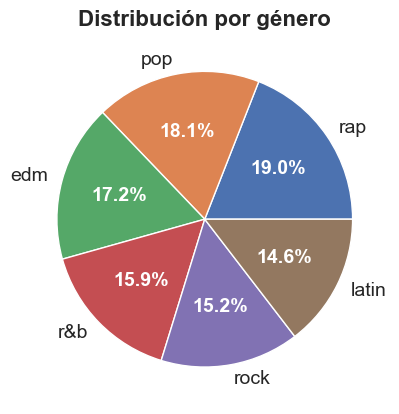

In [34]:
sample = df.groupby('playlist_genre').agg({'track_id': 'count'}).rename(columns={'track_id': 'track_count'}).sort_values(by='track_count', ascending=False)
track_counts = sample['track_count']

wedges, texts, autotexts = plt.pie(
    track_counts,
    labels=sample.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14}  # Aumenta el tamaño del texto
)

# Aplicar estilos a los porcentajes (autotexts)
for autotext in autotexts:
    autotext.set_color('white')  # Cambiar color de texto a blanco
    autotext.set_fontweight('bold')  # Hacer los números en negrita

plt.title('Distribución por género', fontsize=16, fontweight='bold')  # Aumenta el tamaño y pone en negrita el título
plt.show()

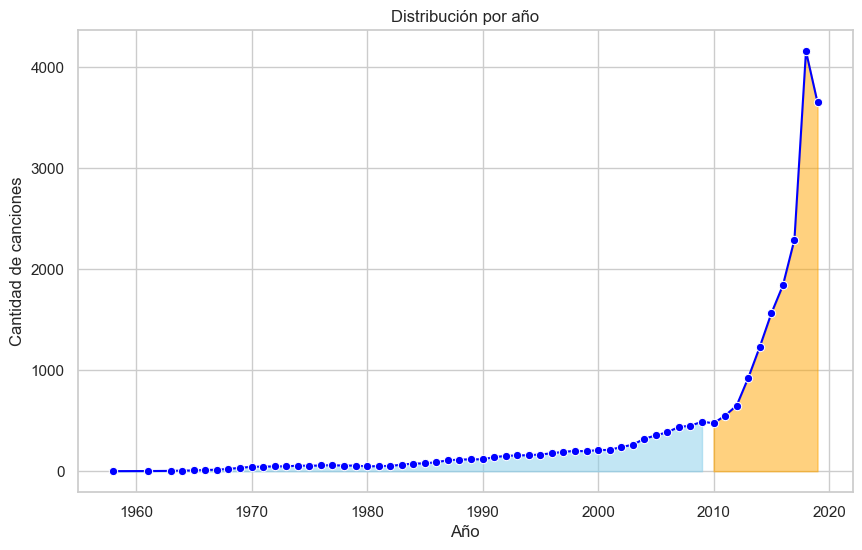

In [35]:
# Assuming your DataFrame is named df and has a 'track_album_release_date' column
df['year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

# Counting the number of songs released each year
yearly_tracks = df['year'].value_counts().sort_index()

# Now, proceed with the rest of your code:
# Removing the most recent year if it's incomplete
#yearly_tracks = yearly_tracks[yearly_tracks.index < 2024]  # Adjust the year based on your dataset

# Smoothing the trend with a rolling average
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

# Plotting the smoothed trend with annotations and color coding
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Distribución por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.grid(True)

# Adding annotations for key points
max_year = yearly_tracks.idxmax()
max_value = yearly_tracks.max()
plt.annotate(f'Maximum in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value + 500),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

# Color coding different eras
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2010, color='skyblue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2010, color='orange', alpha=0.5)

plt.show()

c:\Users\Martin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Martin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


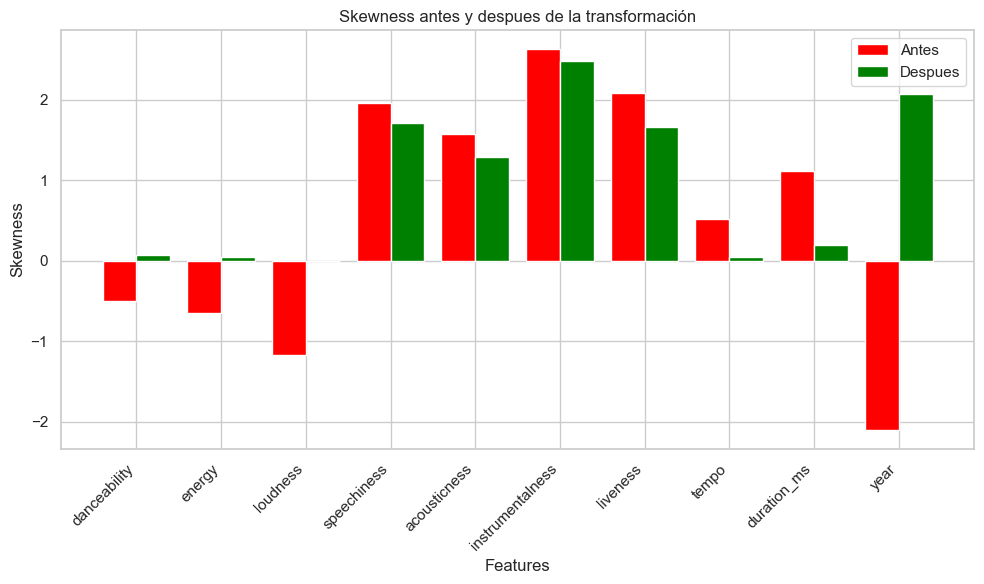

In [36]:
skew_df = pd.DataFrame(columns=['feature', 'before', 'after', 'transformer'])


def remove_skewness(feature, df):
    
    skew = df[feature].skew()
    output = df[feature]
    row = [feature, skew, 0, 'None'] 
    transformers = [np.log1p, np.sqrt] if skew > 0 else [np.square, np.exp, lambda x: x**3]

    
    for transformer in transformers:
        sample = transformer(df[feature] + 1) if transformer == np.sqrt else transformer(df[feature])
        if abs(sample.skew()) < abs(skew):
            skew = abs(sample.skew())
            output = sample
            row[2] = skew  
            row[3] = transformer._name_ if hasattr(transformer, '_name_') else str(transformer)

    skew_df.loc[len(skew_df)] = row
    return output

categorical_feat = []
numerical_feat = []
#Separamos nuestro dataset entre variables numericas y categoricas
for col in df.columns:
  if df[col].dtype == 'object':
    categorical_feat.append(col)
  else:
    numerical_feat.append(col)

skewed_features = [feat for feat in numerical_feat if abs(df[feat].skew()) >= 0.5]
#Aplicamos el skew solo a las variables numericas
for feat in skewed_features:
  df[feat] = remove_skewness(feat, df)


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = range(len(skew_df))
bars_before = ax.bar(index, skew_df['before'], bar_width, label='Antes', color='red')
bars_after = ax.bar([i + bar_width for i in index], skew_df['after'], bar_width, label='Despues', color='green')
ax.set_xlabel('Features')
ax.set_ylabel('Skewness')
ax.set_title('Skewness antes y despues de la transformación')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(skew_df['feature'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

In [37]:
skew_df

feature    before     after  \
0      danceability -0.501050  0.074020   
1            energy -0.643568  0.050006   
2          loudness -1.166377  0.000000   
3       speechiness  1.964880  1.712719   
4      acousticness  1.576276  1.283834   
5  instrumentalness  2.626059  2.482143   
6          liveness  2.080740  1.666271   
7             tempo  0.517212  0.051844   
8       duration_ms  1.121794  0.196874   
9              year -2.095739  2.067135   

                                         transformer  
0                                   <ufunc 'square'>  
1                                   <ufunc 'square'>  
2                                               None  
3                                    <ufunc 'log1p'>  
4                                    <ufunc 'log1p'>  
5                                    <ufunc 'log1p'>  
6                                    <ufunc 'log1p'>  
7                                    <ufunc 'log1p'>  
8                                    <ufunc 'log1p'>  
9  <function remove_skewness.<locals>.<lambda> at...

In [38]:
df['key'] = df['key'].astype(int)

# Realizar el one-hot encoding
one_hot_encoded = pd.get_dummies(df['key'], prefix='key')

# Creamos un nuevo DataFrame one-hot encoded para key
df_key = pd.concat([df, one_hot_encoded], axis=1)

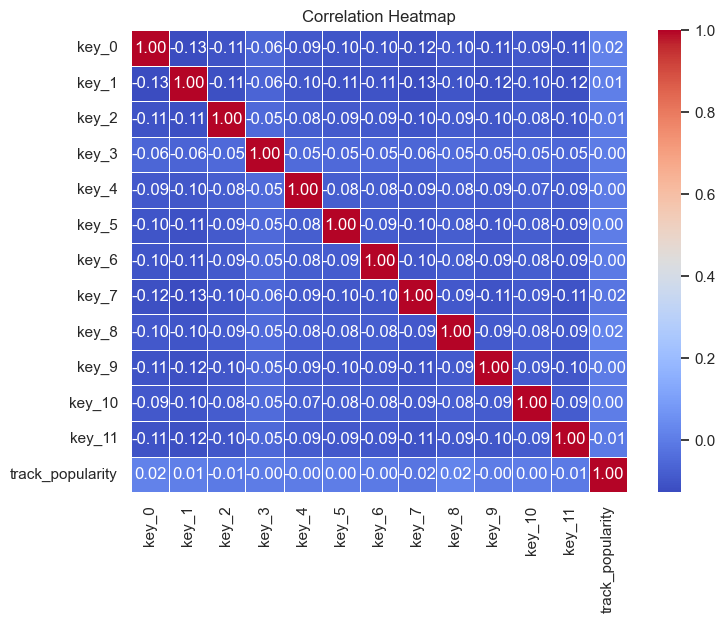

In [39]:
subset = []
subset = df_key[[col for col in df_key.columns if col.startswith('key_')] + ['track_popularity']]

# Calculate the correlation matrix
corr_matrix = subset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Dado que la tonalidad key no tiene correlación con track_popularity será desestimada.

In [40]:
#df.drop(columns=['key'], inplace=True)

In [41]:
# Realizar el one-hot encoding
one_hot_encoded = pd.get_dummies(df['mode'], prefix='mode')

# Combinar el DataFrame original con el nuevo DataFrame one-hot encoded
df = pd.concat([df, one_hot_encoded], axis=1)

In [42]:
# Escalado loudness
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled['loudness'] = scaler.fit_transform(df[['loudness']])

In [43]:
df_scaled.to_csv('df_scaled.csv')
